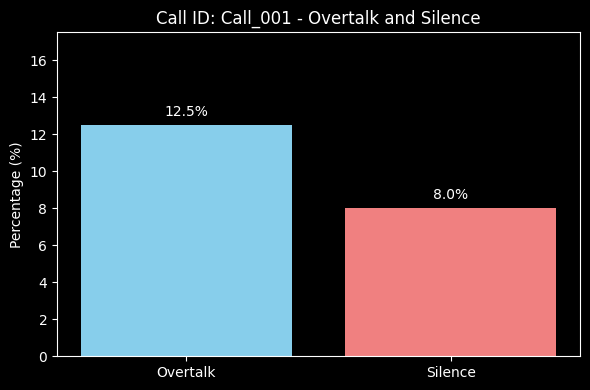

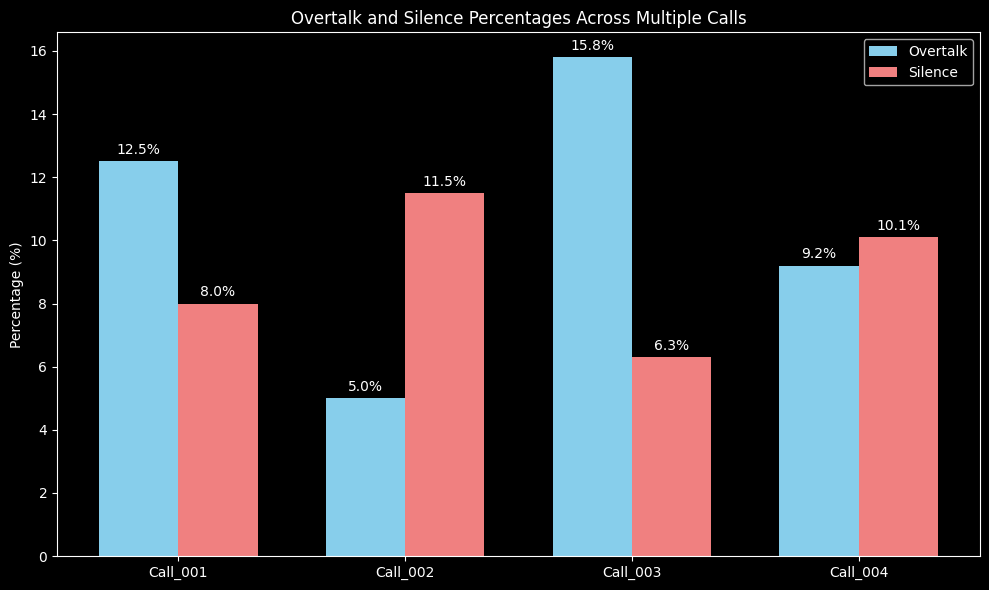

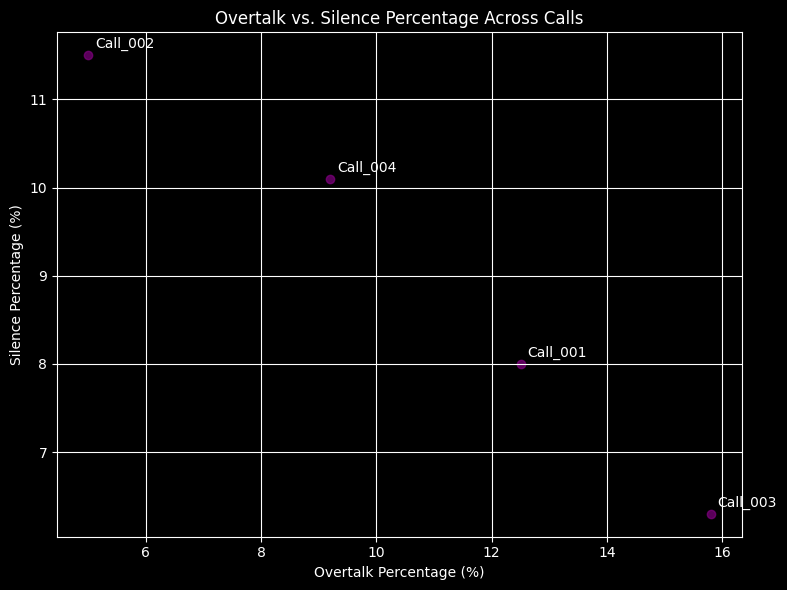

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for a single call (replace with your actual calculated metrics)
call_id = "Call_001"
overtalk_percentage = 12.5  # Example: 12.5% of the call was overtalk
silence_percentage = 8.0  # Example: 8.0% of the call was silence

# 1. Bar chart for a single call's metrics
labels = ["Overtalk", "Silence"]
percentages = [overtalk_percentage, silence_percentage]
colors = ["skyblue", "lightcoral"]

plt.figure(figsize=(6, 4))
plt.bar(labels, percentages, color=colors)
plt.ylabel("Percentage (%)")
plt.title(f"Call ID: {call_id} - Overtalk and Silence")
plt.ylim(0, max(percentages) + 5)  # Adjust y-axis limits for better visualization
for i, v in enumerate(percentages):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center")
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------

# Example data for multiple calls (replace with your calculated metrics for all calls)
call_ids = ["Call_001", "Call_002", "Call_003", "Call_004"]
overtalk_percentages = [12.5, 5.0, 15.8, 9.2]
silence_percentages = [8.0, 11.5, 6.3, 10.1]

# 2. Grouped bar chart for multiple calls
x = np.arange(len(call_ids))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(
    x - width / 2, overtalk_percentages, width, label="Overtalk", color="skyblue"
)
rects2 = ax.bar(
    x + width / 2, silence_percentages, width, label="Silence", color="lightcoral"
)

ax.set_ylabel("Percentage (%)")
ax.set_title("Overtalk and Silence Percentages Across Multiple Calls")
ax.set_xticks(x)
ax.set_xticklabels(call_ids)
ax.legend()

ax.bar_label(rects1, padding=3, fmt="%.1f%%")
ax.bar_label(rects2, padding=3, fmt="%.1f%%")

fig.tight_layout()
plt.show()

# --------------------------------------------------------------------------

# 3. Scatter plot (potentially useful if you have other call metrics to correlate)
plt.figure(figsize=(8, 6))
plt.scatter(overtalk_percentages, silence_percentages, c="purple", alpha=0.7)
plt.xlabel("Overtalk Percentage (%)")
plt.ylabel("Silence Percentage (%)")
plt.title("Overtalk vs. Silence Percentage Across Calls")
for i, txt in enumerate(call_ids):
    plt.annotate(
        txt,
        (overtalk_percentages[i], silence_percentages[i]),
        textcoords="offset points",
        xytext=(5, 5),
        ha="left",
    )
plt.grid(True)
plt.tight_layout()
plt.show()

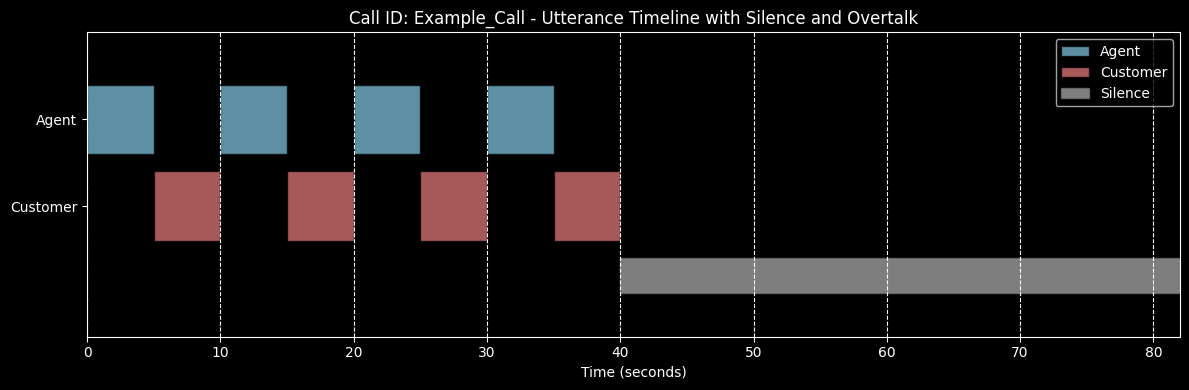

Silence Intervals: [(40, 82)]
Overtalk Intervals: []
Total Duration: 82


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def analyze_call_timeline(utterances, total_duration=None):
    """
    Analyzes a list of utterances to identify silence and overtalk intervals.

    Args:
        utterances (list): A list of dictionaries, where each dictionary
                           has 'speaker', 'stime', and 'etime'.
        total_duration (float, optional): The total duration of the call.
                                         If None, it will be inferred from the
                                         latest utterance end time.

    Returns:
        tuple: A tuple containing:
               - silence_intervals (list of tuples): (start_time, end_time) of silence.
               - overtalk_intervals (list of tuples): (start_time, end_time) of overtalk.
               - max_time (float): The maximum time in the call.
    """
    silence_intervals = []
    overtalk_intervals = []
    sorted_utterances = sorted(utterances, key=lambda x: x["stime"])
    max_time = 0

    for utt in sorted_utterances:
        max_time = max(max_time, utt["etime"])

    if total_duration is None:
        total_duration = max_time

    # Calculate silence
    if sorted_utterances:
        if sorted_utterances[0]["stime"] > 0:
            silence_intervals.append((0, sorted_utterances[0]["stime"]))
        for i in range(len(sorted_utterances) - 1):
            if sorted_utterances[i + 1]["stime"] > sorted_utterances[i]["etime"]:
                silence_intervals.append(
                    (sorted_utterances[i]["etime"], sorted_utterances[i + 1]["stime"])
                )
        if sorted_utterances[-1]["etime"] < total_duration:
            silence_intervals.append((sorted_utterances[-1]["etime"], total_duration))
    elif total_duration > 0:
        silence_intervals.append((0, total_duration))

    # Calculate overtalk
    for i in range(len(sorted_utterances)):
        for j in range(i + 1, len(sorted_utterances)):
            utt1 = sorted_utterances[i]
            utt2 = sorted_utterances[j]
            if utt1["speaker"] != utt2["speaker"]:
                overlap_start = max(utt1["stime"], utt2["stime"])
                overlap_end = min(utt1["etime"], utt2["etime"])
                if overlap_start < overlap_end:
                    overtalk_intervals.append((overlap_start, overlap_end))

    return silence_intervals, overtalk_intervals, total_duration

utterance_data = [
    {"speaker": "Agent", "stime": 0, "etime": 5},
    {"speaker": "Customer", "stime": 5, "etime": 10},
    {"speaker": "Agent", "stime": 10, "etime": 15},
    {"speaker": "Customer", "stime": 15, "etime": 20},
    {"speaker": "Agent", "stime": 20, "etime": 25},
    {"speaker": "Customer", "stime": 25, "etime": 30},
    {"speaker": "Agent", "stime": 30, "etime": 35},
    {"speaker": "Customer", "stime": 35, "etime": 40},
]

def plot_call_timeline(
    call_id, utterances, silence_intervals, overtalk_intervals, total_duration
):
    """
    Generates a timeline visualization of the call.

    Args:
        call_id (str): The ID of the call.
        utterances (list): The list of utterance dictionaries.
        silence_intervals (list of tuples): Silence intervals.
        overtalk_intervals (list of tuples): Overtalk intervals.
        total_duration (float): The total duration of the call.
    """
    fig, ax = plt.subplots(figsize=(12, 4))
    y_agent = 1
    y_customer = 0
    bar_height = 0.8

    # Plot agent utterances
    for utt in [u for u in utterances if u["speaker"] == "Agent"]:
        rect = patches.Rectangle(
            (utt["stime"], y_agent - bar_height / 2),
            utt["etime"] - utt["stime"],
            bar_height,
            linewidth=1,
            edgecolor="black",
            facecolor="skyblue",
            alpha=0.7,
            label=(
                "Agent"
                if not any(rect.get_label() == "Agent" for rect in ax.patches)
                else ""
            ),
        )
        ax.add_patch(rect)

    # Plot customer utterances
    for utt in [u for u in utterances if u["speaker"] == "Customer"]:
        rect = patches.Rectangle(
            (utt["stime"], y_customer - bar_height / 2),
            utt["etime"] - utt["stime"],
            bar_height,
            linewidth=1,
            edgecolor="black",
            facecolor="lightcoral",
            alpha=0.7,
            label=(
                "Customer"
                if not any(rect.get_label() == "Customer" for rect in ax.patches)
                else ""
            ),
        )
        ax.add_patch(rect)

    # Plot silence intervals
    for start, end in silence_intervals:
        rect = patches.Rectangle(
            (start, -1),
            end - start,
            0.4,
            linewidth=1,
            edgecolor="gray",
            facecolor="lightgray",
            alpha=0.6,
            label=(
                "Silence"
                if not any(rect.get_label() == "Silence" for rect in ax.patches)
                else ""
            ),
        )
        ax.add_patch(rect)

    # Plot overtalk intervals
    for start, end in overtalk_intervals:
        rect = patches.Rectangle(
            (start, 1.5),
            end - start,
            0.4,
            linewidth=1,
            edgecolor="orange",
            facecolor="orange",
            alpha=0.6,
            label=(
                "Overtalk"
                if not any(rect.get_label() == "Overtalk" for rect in ax.patches)
                else ""
            ),
        )
        ax.add_patch(rect)

    ax.set_xlabel("Time (seconds)")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["Customer", "Agent"])
    ax.set_title(f"Call ID: {call_id} - Utterance Timeline with Silence and Overtalk")
    ax.set_xlim(0, total_duration)
    ax.set_ylim(-1.5, 2)
    ax.legend(loc="upper right")
    plt.grid(axis="x", linestyle="--")
    plt.tight_layout()
    plt.show()


call_id = "Example_Call"
silence, overtalk, duration = analyze_call_timeline(utterance_data, total_duration=82)
plot_call_timeline(call_id, utterance_data, silence, overtalk, duration)

print("Silence Intervals:", silence)
print("Overtalk Intervals:", overtalk)
print("Total Duration:", duration)